In [1]:
import requests, json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Build data source statistics
data_sources = []
seasons = ['2016-17','2017-18','2018-19','2019-20','2020-21']
tables = ['merged_gw.csv','players_raw.csv']

In [ ]:
# Iterate through tables
for s in seasons:
    for t in tables:
        file_name = s+"_"+t
        df = pd.read_csv(file_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
        file_summary = [file_name, len(df),len(df.columns),",".join(col for col in df)]
        data_sources.append(file_summary)

In [ ]:
file_name = "2016-17_merged_gw.csv"
df_1617 = pd.read_csv(file_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
file_summary = [file_name, len(df_1617),len(df_1617.columns),",".join(col for col in df_1617)]
data_sources.append(file_summary)

In [ ]:
#Generate data columns
list_df = []
for ds in data_sources:
    columns = ds[3].split(",")
    columns.sort()
    columns.insert(0,ds[0])
    list_df.append(columns)
df1 = pd.DataFrame(list_df)

In [ ]:
df1.to_csv("data_columns.csv",index = False)

### EDA Collect Player Data

In [ ]:
#read all players data and merge
df_p_all = pd.DataFrame(columns  = ['season','id','chance_of_playing_next_round', 'chance_of_playing_this_round', 'element_type'])
for s in seasons: 
    pf_name = s+"_"+"players_raw.csv"
    df_p = pd.read_csv(pf_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
    df_p = df_p[['id','chance_of_playing_next_round', 'chance_of_playing_this_round', 'element_type']]
    df_p['season'] = s
    print(df_p.shape)
    df_p_all = df_p_all.append(df_p,ignore_index=True)

In [ ]:
df_p_all['chance_of_playing_this_round'].describe()

In [ ]:
df_p_all['chance_of_playing_this_round'].value_counts(normalize= True,sort = True) 

### EDA Group by Week-player and summary statistics

In [3]:
df_gw_all = pd.DataFrame(columns  = ['season','GW', 'element', 'name', 'minutes', 'value', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'bonus', 'total_points', 'influence', 'creativity', 'threat', 'ict_index', 'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets', 'was_home'])
for s in seasons: 
    pf_name = s+"_"+"merged_gw.csv"
    df_gw = pd.read_csv(pf_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
    df_gw = df_gw[['GW', 'element', 'name', 'minutes', 'value', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'bonus', 'total_points', 'influence', 'creativity', 'threat', 'ict_index', 'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets', 'was_home']]
    df_gw['season'] = s
    print(df_gw.shape)
    df_gw_all = df_gw_all.append(df_gw,ignore_index=True)

(23679, 22)
(22467, 22)
(21790, 22)
(22560, 22)
(24365, 22)


In [ ]:
a = np.array(df_gw_all['GW'])
np.unique(a)

In [ ]:
df_gw_all.to_csv("df_gw_all.csv",index = False,encoding = "ISO-8859-1")

In [ ]:
df_gw_all[['influence', 'creativity', 'threat']].describe()

In [ ]:
df_gw_all['was_home'].value_counts(normalize= True,sort = False) 

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90]
df_gw_all['minutes_binned']= pd.cut(df_gw_all['minutes'],bins)
df_gw_all["minutes_binned"].value_counts(normalize= True,sort = False) 

In [ ]:
bins = [0,500,1000,5000,10000,50000,100000,5000000]
df_gw_all['selected_binned']= pd.cut(df_gw_all['selected'],bins)
df_gw_all["selected_binned"].value_counts(normalize= True,sort = False) 

### EDA Data visualization

In [ ]:
# value of players across seasons
# https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
value_1617 = df_gw_all.loc[df_gw_all['season'] == '2016-17', ['value']]
# value_1617 = value_1617.groupby('element')['value'].mean().reset_index()
value_1718 = df_gw_all.loc[df_gw_all['season'] == '2017-18', ['value']]
value_1819 = df_gw_all.loc[df_gw_all['season'] == '2018-19', ['value']]
value_1920 = df_gw_all.loc[df_gw_all['season'] == '2019-20', ['value']]
value_2021 = df_gw_all.loc[df_gw_all['season'] == '2020-21', ['value']]
values = [value_1617, value_1718, value_1819, value_1920,value_2021]
for value in values:
    value['value'] = value['value'].astype('float')
fig, ax = plt.subplots()
ax.boxplot([value_1617['value'],value_1718['value'],value_1819['value'],value_1920['value'],value_2021['value']])
plt.xticks([1, 2, 3, 4,5], ["2016-17", "2017-18", "2018-19", "2019-20","2020-21"], rotation=10)
plt.savefig("value_boxplot.png") # must be before show
plt.show()

C:\Users\yingy\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


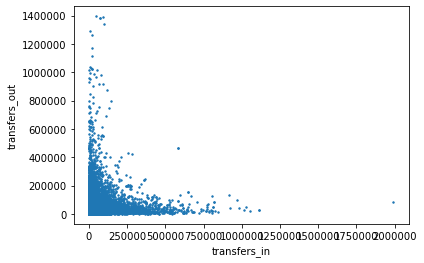

In [19]:
# transfer-in & out across all seasons
transfer_all = df_gw_all[[ 'transfers_in', 'transfers_out']]
for c in transfer_all.columns:
    transfer_all[c] = transfer_all[c].astype('int')
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
plt.scatter(transfer_all['transfers_in'], transfer_all['transfers_out'],s=2)
plt.xlabel('transfers_in')
plt.ylabel('transfers_out')
plt.savefig("transfer_scatter.png")
plt.show()

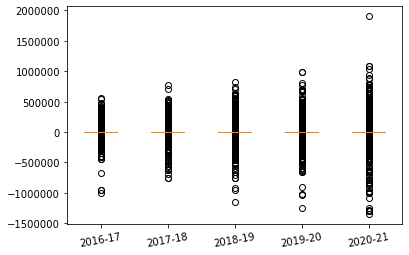

In [25]:
# transfer balance of game week trades across seasons

tb_1617 = df_gw_all.loc[df_gw_all['season'] == '2016-17', ['transfers_balance']]
# value_1617 = value_1617.groupby('element')['value'].mean().reset_index()
tb_1718 = df_gw_all.loc[df_gw_all['season'] == '2017-18', ['transfers_balance']]
tb_1819 = df_gw_all.loc[df_gw_all['season'] == '2018-19', ['transfers_balance']]
tb_1920 = df_gw_all.loc[df_gw_all['season'] == '2019-20', ['transfers_balance']]
tb_2021 = df_gw_all.loc[df_gw_all['season'] == '2020-21', ['transfers_balance']]
tbs = [tb_1617, tb_1718, tb_1819, tb_1920,tb_2021]
for tb in tbs:
    tb['transfers_balance'] = tb['transfers_balance'].astype('int')
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
ax.boxplot([tb_1617['transfers_balance'],tb_1718['transfers_balance'],tb_1819['transfers_balance'],tb_1920['transfers_balance'],tb_2021['transfers_balance']])
plt.xticks([1, 2, 3, 4,5], ["2016-17", "2017-18", "2018-19", "2019-20","2020-21"], rotation=10)
plt.savefig("tb_boxplot.png") # must be before show
plt.show()

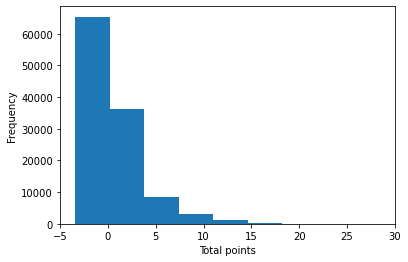

In [40]:
# Total_points by game week across all seasons 
totalpoint_all = df_gw_all.loc[:,'total_points']
totalpoint_all.astype('int32').dtypes
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
plt.xlim(-5, 30)
plt.hist(totalpoint_all)
plt.xlabel('Total points')
plt.ylabel('Frequency')
plt.savefig("totalpoints_hist.png")
plt.show() 

In [ ]:
# function to aggregate play stats over the season
def agg_player(x):
        d = []
        d.append(x['GW'].nunique())
        d.append(x['total_points'].max())
        d.append(x['total_points'].min())
        d.append(x['total_points'].mean())
        d.append(x['total_points'].sum())
        d.append(x['minutes'].mean())
        d.append(x['minutes'].sum())
        d.append(x['value'].mean())
        return pd.Series(d, index= ['GW_participated', 'total_points_max','total_points_min','total_points_mean','total_points_sum','minutes_mean','minutes_sum','value_mean'])

In [ ]:
# EDA Group by player and count week
# Get data subset: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html
print (df_1617['element'].nunique())
df_1617_p = df_1617.reset_index()[['name', 'element','bonus', 'loaned_in', 'loaned_out','minutes','opponent_team', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out','value', 'GW']]
df_1617_p_byname = df_1617_p.groupby(['element','name']).apply(agg_player).reset_index()

In [ ]:
df_1617_p[df_1617_p['element'] == 77]
# a['minutes_sum'].describe()

In [ ]:
### FPL API only contains detailed data for the current season and aggregate data for past seasons, so no use
### Reference: https://medium.com/analytics-vidhya/getting-started-with-fantasy-premier-league-data-56d3b9be8c32
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

# get player data from 'elements' field
players = r['elements']
events = r['events']
# show data for first player
pprint(events)

base_url = "https://fantasy.premierleague.com/api/"
def get_season_history(player_id):
    '''get all past season info for a given player_id'''
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(base_url + 'element-summary/' + str(player_id) + '/').json()
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    return df

# show player #1's gameweek history
get_season_history(1)[
    [
        'season_name',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head(10)